## Decision Tree Classification

CART - Classification And Regression Tree

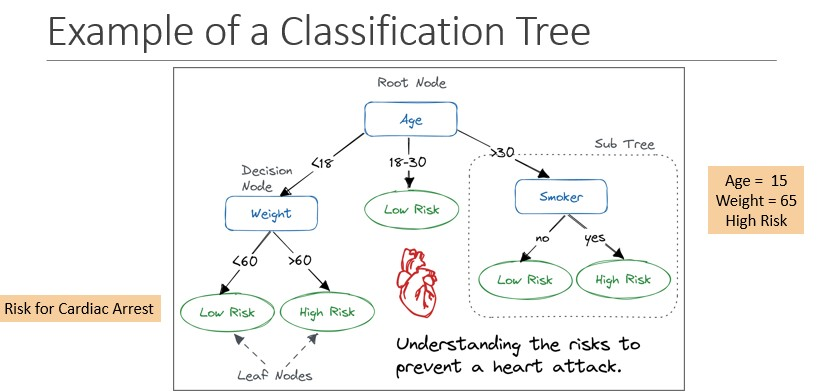

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1: Read the train dataset

In [4]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df = df.drop_duplicates(keep="first")
df = df.reset_index(drop=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


## Step 3 - Seperate X and Y (species)

In [9]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

# Step 4: Apply Preprocessing for X

In [13]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


# Step 5 - Train Test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=42
)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
95,-0.173447,-0.137353,0.255985,0.007064
104,0.792668,-0.137353,1.164122,1.322752
66,-0.294211,-0.137353,0.426261,0.401770
0,-0.898033,1.012401,-1.333255,-1.308624
141,1.275726,0.092598,0.766812,1.454321


In [19]:
ytrain.head()

,species
95,versicolor
104,virginica
66,versicolor
0,setosa
141,virginica


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.309611,-0.597255,0.539778,0.007064
18,-0.173447,1.702254,-1.162979,-1.177055
117,2.241842,1.702254,1.674949,1.322752
78,0.188846,-0.367304,0.426261,0.401770
76,1.154962,-0.597255,0.596536,0.270202


In [21]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [22]:
xtrain.shape

(99, 4)

In [23]:
xtest.shape

(50, 4)

# Step 5: Model Building

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy"
)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [25]:
dtc.score(xtrain, ytrain)

0.6666666666666666

In [26]:
dtc.score(xtest, ytest)

0.68

# Hyperparameter tuning to improve model performance

In [27]:
params = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split":[5, 6, 7, 8, 9],
    "min_samples_leaf":[5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

In [28]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
gscv = GridSearchCV(
    estimator= model,
    param_grid= params,
    scoring= "f1_macro",
    cv = 5
)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [30]:
gscv.best_score_

np.float64(0.9319552669552669)

In [31]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

# Step 6 - Model evaluation

In [32]:
best_dtc.score(xtrain, ytrain)

0.9393939393939394

In [33]:
best_dtc.score(xtest, ytest)

1.0

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

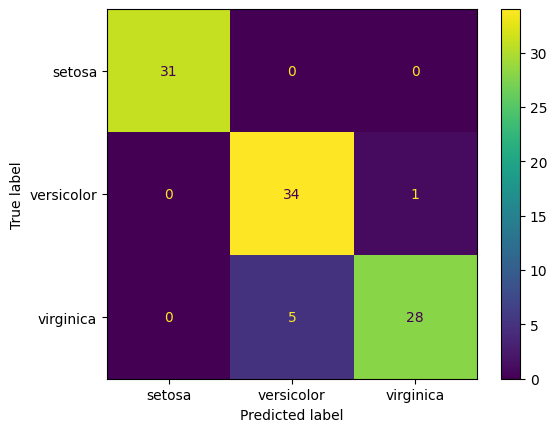

In [35]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain, ytrain)

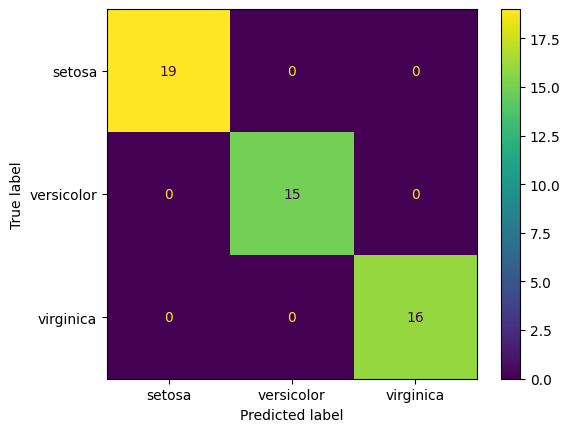

In [36]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [37]:
ypred_test = best_dtc.predict(xtest)

In [38]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [39]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Feature importance

In [41]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [42]:
imp = best_dtc.feature_importances_
imp = pd.Series(imp, index = xtrain.columns)
imp

sepal_length    0.011351
sepal_width     0.000000
petal_length    0.942368
petal_width     0.046282
dtype: float64

In [43]:
imp.sort_values()

sepal_width     0.000000
sepal_length    0.011351
petal_width     0.046282
petal_length    0.942368
dtype: float64

<Axes: >

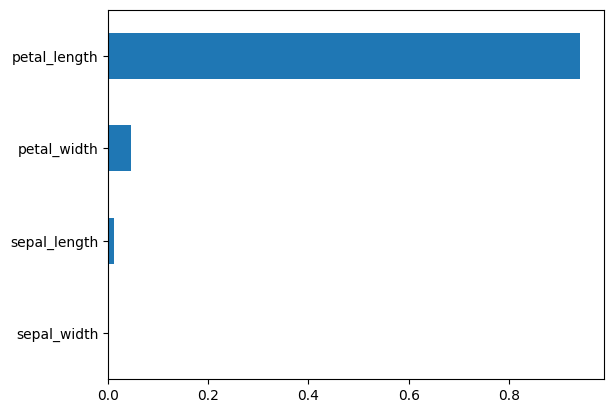

In [44]:
imp.sort_values().plot(kind="barh")

# Predict out of sample results

In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,0.000000,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.000000


In [48]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [49]:
probs = best_dtc.predict_proba(xnew_pre)
probs

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5]])

In [50]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
xnew["species_pred"] = preds
xnew[best_dtc.classes_] = probs

In [52]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,1.0,0.0
1,6.9,3.1,5.1,2.3,virginica,0.0,0.0,1.0
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.8,0.2
3,4.4,2.9,NaN,0.2,versicolor,0.0,0.8,0.2
4,5.9,3.0,5.1,1.8,virginica,0.0,0.2,0.8
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
6,5.6,NaN,3.6,1.3,versicolor,0.0,1.0,0.0
7,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0,0.0


In [53]:
xnew.to_csv("results.csv", index=False)